### MATH 350 Numerical Analysis Homework

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List, Union
from collections.abc import Callable
from decimal import Decimal, getcontext

#### Brief Background

We denote $Y(x)$ as the true solution to the Initial Value Problem (IVP). The initial value is $Y_0$

\begin{cases} 
  Y'(x) = f(x, Y(x)), & \quad x_0 \leq x \leq b, \\
  Y(x_0) = Y_0 &
\end{cases}


\begin{align*}
x_n &= x_0 + nh, \quad n = 0, 1, \dots, N
\end{align*}

\begin{align*}
y(x_n) = y_h(x_n) = y_n \quad n = 0, 1, \dots, N
\end{align*}


#### Presented Problem

$$Y(x) = \tan^{-1}(x)$$ $$Y(0) = 0$$

In [117]:
getcontext().prec = 50 

In [384]:
""" Problem 8.2-1a
def y(x: Union[int, float]) -> Union[np.float64, np.ndarray]:
    return np.arctan(x)
"""

# Problem 8.2-1b
def y(x: Union[int, float]) -> Union[np.float64, np.ndarray]:
    return np.divide(x, (1+np.pow(x, 2)))

In [386]:
""" Problem 8.2-1a
def y_p(x: Union[int, float]) -> Union[np.float64, np.ndarray]:
    return np.pow(np.cos(y(x)), 2)
"""

# Problem 8.2-1b
def y_p(x: Union[int, float]) -> Union[np.float64, np.ndarray]:
    return np.divide(1, (1+np.pow(x, 2))) - 2*(np.pow(y(x), 2))

In [394]:
def eulers_method(n: int,
                  h: Union[float, int],
                  x_0: Union[int, float],
                  y_0: Union[int, float],
                  y: Callable[[int, float], [np.float64, np.ndarray]],
                  yp: Callable[[int, float], [np.float64, np.ndarray]]
                 ) -> Union[np.float64, np.ndarray]:
    y_values = [y_0]
    x_values = [x_0]
    for i in range(n):
        x_i = x_values[-1]
        y_i = y_values[-1]
        
        y_c = y_i + (h * yp(x_i))
        y_values.append(y_c)
        x_values.append(x_i + h)
        
    return np.array(x_values), np.array(y_values)

In [403]:
hs = np.full(51, 0.1)
xs = np.linspace(0, 10, 51)
ys = y(xs)
x_eul, y_eul = eulers_method(n=300, h=0.2, x_0=0, y_0=0, y=y, yp=y_p)
x_eul_valid = x_eul[x_eul <= 10]
y_eul_valid = y_eul[:len(x_eul_valid)]

In [404]:
x_eul_valid.shape, xs.shape

((51,), (51,))

/var/folders/5t/xvdn2t716px23rkw1k6ddnd00000gn/T/ipykernel_33770/942768123.py:8: RuntimeWarning: invalid value encountered in divide
  "Relative Error": [np.abs(np.divide((y(x_eul_valid[i]) - val), val)) for i, val in enumerate(y_eul_valid)]


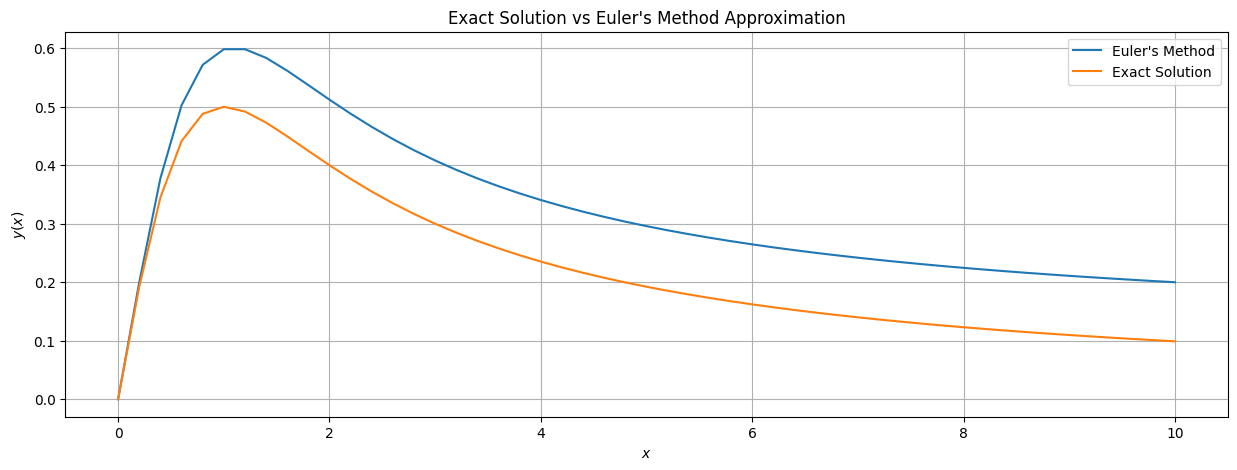

In [405]:
df = pd.DataFrame({
    "$h_{n}$": hs,
    "$x_{\text{Y}}$": xs,
    "$y_{\text{Y}}$": ys,
    "$x_{\text{EUL}}$": x_eul_valid,
    "$y_{\text{EUL}}$": y_eul_valid,
    "Error": [np.abs((y(x_eul_valid[i]) - val)) for i, val in enumerate(y_eul_valid)],
    "Relative Error": [np.abs(np.divide((y(x_eul_valid[i]) - val), val)) for i, val in enumerate(y_eul_valid)]
})

plt.figure(figsize=(15, 5))
plt.plot(df["$x_{\text{EUL}}$"], df["$y_{\text{EUL}}$"], label="Euler's Method")
plt.plot(df["$x_{\text{Y}}$"], df["$y_{\text{Y}}$"], label="Exact Solution")
plt.title('Exact Solution vs Euler\'s Method Approximation')
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.grid(True)
plt.legend()
plt.show()

In [406]:
df[0:105:5]

,$h_{n}$,$x_{\text{Y}}$,$y_{\text{Y}}$,$x_{\text{EUL}}$,$y_{\text{EUL}}$,Error,Relative Error
0,0.1,0.0,0.000000,0.0,0.000000,0.000000,NaN
5,0.1,1.0,0.500000,1.0,0.598340,0.098340,0.164355
10,0.1,2.0,0.400000,2.0,0.512107,0.112107,0.218914
15,0.1,3.0,0.300000,3.0,0.408120,0.108120,0.264922
20,0.1,4.0,0.235294,4.0,0.340555,0.105261,0.309086
25,0.1,5.0,0.192308,5.0,0.295900,0.103592,0.350092
30,0.1,6.0,0.162162,6.0,0.264745,0.102583,0.387478
35,0.1,7.0,0.140000,7.0,0.241937,0.101937,0.421337
40,0.1,8.0,0.123077,8.0,0.224580,0.101503,0.451968
45,0.1,9.0,0.109756,9.0,0.210954,0.101198,0.479716
